In [12]:
!git clone https://github.com/fastai/fastai
!pip install -e "fastai[dev]"


Cloning into 'fastai'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 13910 (delta 45), reused 43 (delta 8), pack-reused 13798
Receiving objects: 100% (13910/13910), 639.06 MiB | 36.72 MiB/s, done.
Resolving deltas: 100% (10895/10895), done.
Obtaining file:///content/fastai
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 12.8MB 247kB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 839kB 49.0MB/s 
     |████████████████████████████████| 204kB 60.3MB/s 
     |████████████████████████████████| 2.2MB 48.7MB/s 
     |████████████████████████████████| 1.2MB 47.9MB/s 
     |████████████████████████████████| 1.9MB 57.9MB/s 
     |████████████████████████████████| 471kB 56.2MB/s 
     |████████████████████████████████| 4.4MB 46.2MB/s 
     

In [2]:
from fastai.vision.all import *
from fastai.data.all import *


In [22]:
!unzip content/images.zip -d content/

unzip:  cannot find or open content/images.zip, content/images.zip.zip or content/images.zip.ZIP.


In [20]:
!nvidia-smi

Thu Apr  8 13:03:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
lego = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [24]:
dls = lego.dataloaders("Images")

In [25]:
learn = cnn_learner(dls, resnet18,metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.769047,0.157471,0.031250,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.047973,0.011835,0.000000,00:04
1,0.020875,0.000952,0.000000,00:04
2,0.011445,0.000101,0.000000,00:04
3,0.007311,0.000275,0.000000,00:04


In [28]:
learn.export("deeplearner.pkl")

In [30]:
learner = load_learner("deeplearner.pkl")

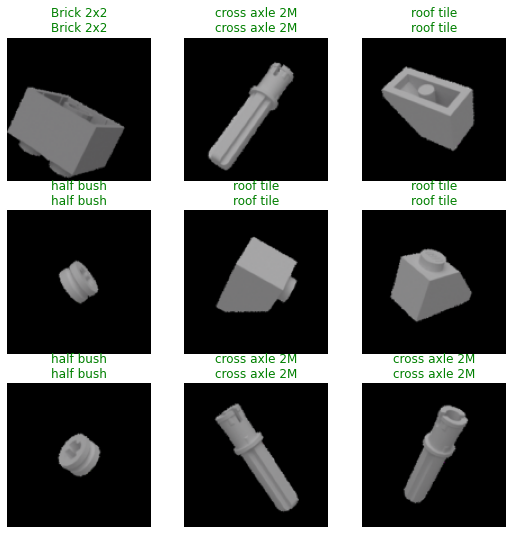

In [33]:
learn.show_results()

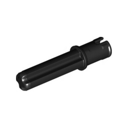

In [35]:
img = Image.open("crossaxletest.jpg")
img.to_thumb(128,128)

In [36]:
learn.predict("crossaxletest.jpg")

('cross axle 2M',
 tensor(1),
 tensor([2.1332e-03, 9.9457e-01, 9.9293e-04, 2.2998e-03]))

In [37]:
learn.dls.vocab

['Brick 2x2', 'cross axle 2M', 'half bush', 'roof tile']

In [38]:
import ipywidgets as widgets

In [39]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [40]:
out_p1 = widgets.Output()
out_p1.clear_output()
with out_p1: display(img.to_thumb(128,128))
out_p1

Output()

In [44]:
img = PILImage.create(btn_upload.data[-1])

In [46]:
pred, pred_idx,probs = learn.predict(img)

In [47]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [48]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_p1.clear_output()
  with out_p1: display(img.to_thumb(128,128))
  pred, pred_idx, probs =  learn.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [50]:
btn_upload = widgets.FileUpload()
widgets.VBox([widgets.Label('Select your Legobrick'), btn_upload, btn_run,out_p1,lbl_pred])

In [51]:
import ipywidgets as widgets
import requests

In [52]:
inference = load_learner('deeplearner.pkl',cpu=True)